In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("data3.csv")
df = df[df["Page"].apply(lambda s: "?" not in s)]
df.head()

,Page,Date,Country,User Type,Device Category,Users,Time on Page
0,/wp-login.php,"Jun 18, 2021",(not set),New Visitor,desktop,16,0
1,/wp-login.php,"Jan 7, 2020",(not set),New Visitor,desktop,16,0
2,/surveys/your-opinion-important-us/,"Aug 20, 2020",South Africa,Returning Visitor,mobile,129,839
3,/surveys/your-opinion-important-us/,"Dec 5, 2019",South Africa,Returning Visitor,mobile,48,2195
4,/surveys/your-opinion-important-us/,"Apr 6, 2020",South Africa,Returning Visitor,mobile,32,0


In [3]:
df["User Type"] = pd.get_dummies(df["User Type"], drop_first=True)
df["User Type"] = df["User Type"].apply(lambda x: "Returning" if x == 1 else "New")

In [4]:
def lookup(date_pd_series, format=None):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {
        date: pd.to_datetime(date, format=format) for date in date_pd_series.unique()
    }
    return date_pd_series.map(dates)

df["Date"] = lookup(df["Date"], format="%b %d, %Y")

df.head()

,Page,Date,Country,User Type,Device Category,Users,Time on Page
0,/wp-login.php,2021-06-18,(not set),New,desktop,16,0
1,/wp-login.php,2020-01-07,(not set),New,desktop,16,0
2,/surveys/your-opinion-important-us/,2020-08-20,South Africa,Returning,mobile,129,839
3,/surveys/your-opinion-important-us/,2019-12-05,South Africa,Returning,mobile,48,2195
4,/surveys/your-opinion-important-us/,2020-04-06,South Africa,Returning,mobile,32,0


In [5]:
df["Year"] = df["Date"].apply(lambda t: t.year)
df["Month"] = df["Date"].apply(lambda t: t.month)
df["Day"] = df["Date"].apply(lambda t: t.day)

df.drop("Date", axis=1, inplace=True)

df.head()

,Page,Country,User Type,Device Category,Users,Time on Page,Year,Month,Day
0,/wp-login.php,(not set),New,desktop,16,0,2021,6,18
1,/wp-login.php,(not set),New,desktop,16,0,2020,1,7
2,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,129,839,2020,8,20
3,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,48,2195,2019,12,5
4,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,32,0,2020,4,6


In [6]:
topDirs = "surveys sections section search profiles polls documents commenting root".split()

def splitFunc(s):
    x = s.split("/")[1]
    if x == "":
        return "root"
    else:
        return x

df["Page Type"] = df["Page"].apply(splitFunc)

data = df[df["Page Type"].isin(topDirs)]
data = data.reset_index().drop("index", axis=1)

data.head()

,Page,Country,User Type,Device Category,Users,Time on Page,Year,Month,Day,Page Type
0,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,129,839,2020,8,20,surveys
1,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,48,2195,2019,12,5,surveys
2,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,32,0,2020,4,6,surveys
3,/surveys/your-opinion-important-us/,South Africa,Returning,mobile,32,323,2020,3,29,surveys
4,/surveys/your-opinion-important-us/,(not set),Returning,mobile,48,1323,2020,5,6,surveys


In [7]:
data["Time on Page"] = data["Time on Page"].apply(lambda x: x / 60)
data["Session Length"] = data[["Time on Page", "Users"]].apply(lambda x: x[0] / x[1], axis=1)

In [8]:
data = data[(data["Page Type"] == "section") | (data["Page Type"] == "sections")]
data["Page Type"] = "section"

data.head()

,Page,Country,User Type,Device Category,Users,Time on Page,Year,Month,Day,Page Type,Session Length
6338,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2020,4,9,section,0.0
6339,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,9,2,section,0.0
6340,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,6,10,section,0.0
6341,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,10,18,section,0.0
6342,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,9,9,section,0.0


In [9]:
data["Section Type"] = data["Page"].apply(lambda s: s.split("/")[2])

data.head()

,Page,Country,User Type,Device Category,Users,Time on Page,Year,Month,Day,Page Type,Session Length,Section Type
6338,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2020,4,9,section,0.0,نصائح-للطفولة-المبكرة
6339,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,9,2,section,0.0,نصائح-للطفولة-المبكرة
6340,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,6,10,section,0.0,نصائح-للطفولة-المبكرة
6341,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,10,18,section,0.0,نصائح-للطفولة-المبكرة
6342,/sections/نصائح-للطفولة-المبكرة/كيف-يكتشف-ويفه...,(not set),New,desktop,16,0.0,2019,9,9,section,0.0,نصائح-للطفولة-المبكرة


In [10]:
data["Section Type"].value_counts()[:20].index


Index(['connect-smart', 'facts-for-life', 'emergency-information', 'all-in',
       'early-life-tips', 'your-rights', 'facts-life', 'u-report',
       'girls-zone', 'zona-da-menina', 'girl-zone', 'all-and-adolescents',
       'gen2030-act-climate', 'youth', 'generation-2030-future-yours',
       'informações-sobre-o-hivsida', 'covid-19', 'aleitamento-materno',
       'sms-biz-u-report', 'coronavirus-covid-19'],
      dtype='object')

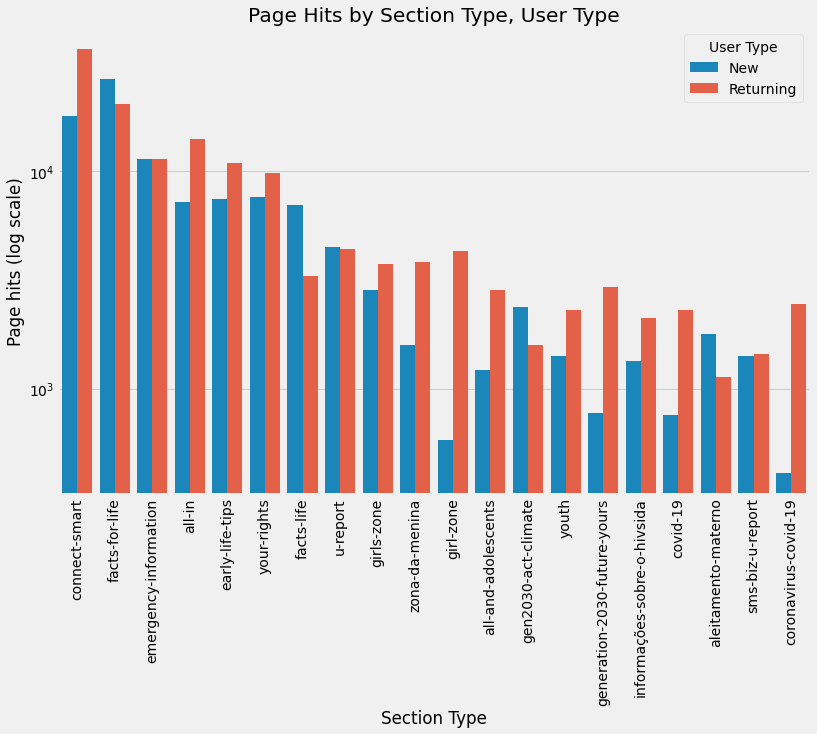

In [11]:
TOP_N_SECTIONS = 20

order = data["Section Type"].value_counts()[:TOP_N_SECTIONS].index

plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
g = sns.countplot(data=data[data["Section Type"].apply(lambda s: s in order)], x="Section Type", order=order, hue="User Type")
ax = g.axes
ax.set_yscale("log")
plt.xlabel("Section Type")
plt.ylabel("Page hits (log scale)")
plt.title("Page Hits by Section Type, User Type")
plt.legend(title="User Type", loc="upper right")

In [12]:
data[data["Section Type"].apply(lambda s: s in order)].groupby(["User Type","Section Type"]).count()[["Page"]]

Page
User Type Section Type                       
New       aleitamento-materno            1784
          all-and-adolescents            1223
          all-in                         7219
          connect-smart                 17946
          coronavirus-covid-19            411
          covid-19                        760
          early-life-tips                7415
          emergency-information         11412
          facts-for-life                26542
          facts-life                     7006
          gen2030-act-climate            2385
          generation-2030-future-yours    770
          girl-zone                       584
          girls-zone                     2830
          informações-sobre-o-hivsida    1348
          sms-biz-u-report               1408
          u-report                       4473
          your-rights                    7579
          youth                          1412
          zona-da-menina                 1587
Returning aleitamento-materno            1128
          all-and-adolescents            2830
          all-in                        14004
          connect-smart                 36641
          coronavirus-covid-19           2446
          covid-19                       2299
          early-life-tips               10916
          emergency-information         11333
          facts-for-life                20451
          facts-life                     3304
          gen2030-act-climate            1585
          generation-2030-future-yours   2936
          girl-zone                      4280
          girls-zone                     3730
          informações-sobre-o-hivsida    2118
          sms-biz-u-report               1452
          u-report                       4378
          your-rights                    9809
          youth                          2299
          zona-da-menina                 3842

<AxesSubplot:title={'center':'Count of Page Hits by User Type'}, xlabel='User Type', ylabel='count'>

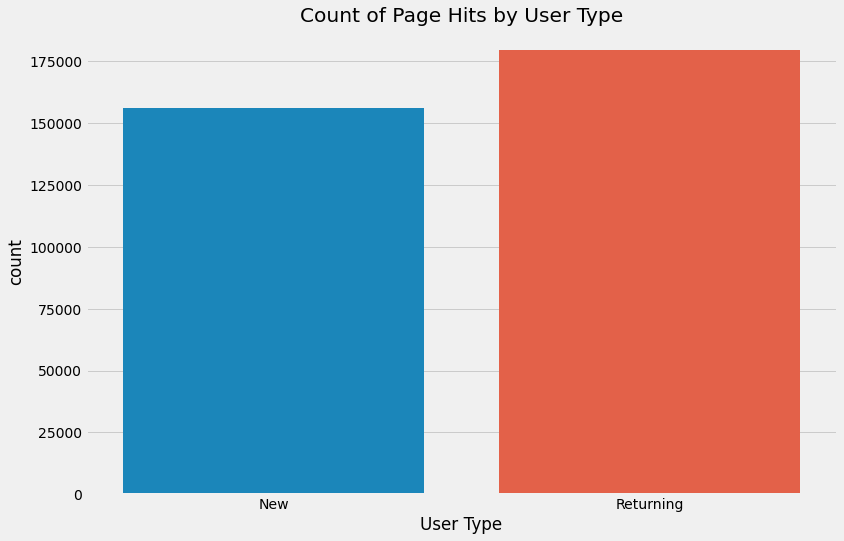

In [13]:
plt.figure(figsize=(12, 8))
plt.title("Count of Page Hits by User Type")
sns.countplot(data=data, x="User Type")

In [14]:
data.groupby("User Type").count()["Page"]

User Type
New          155925
Returning    179515
Name: Page, dtype: int64

<AxesSubplot:title={'center':'Page Hits by Year, User Type'}, xlabel='Year', ylabel='count'>

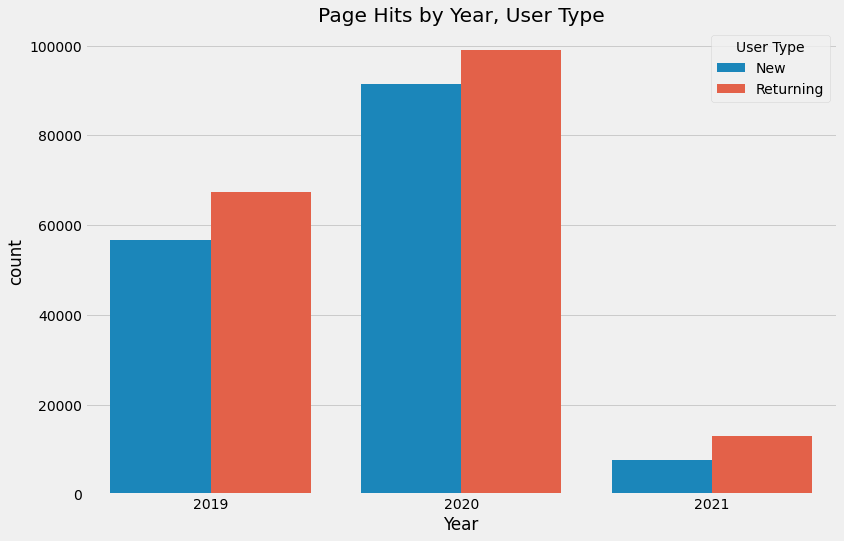

In [15]:
plt.figure(figsize=(12, 8))
plt.title("Page Hits by Year, User Type")
sns.countplot(data=data, x="Year", hue="User Type")

Text(0.5, 0.98, 'Session Length vs. Users')

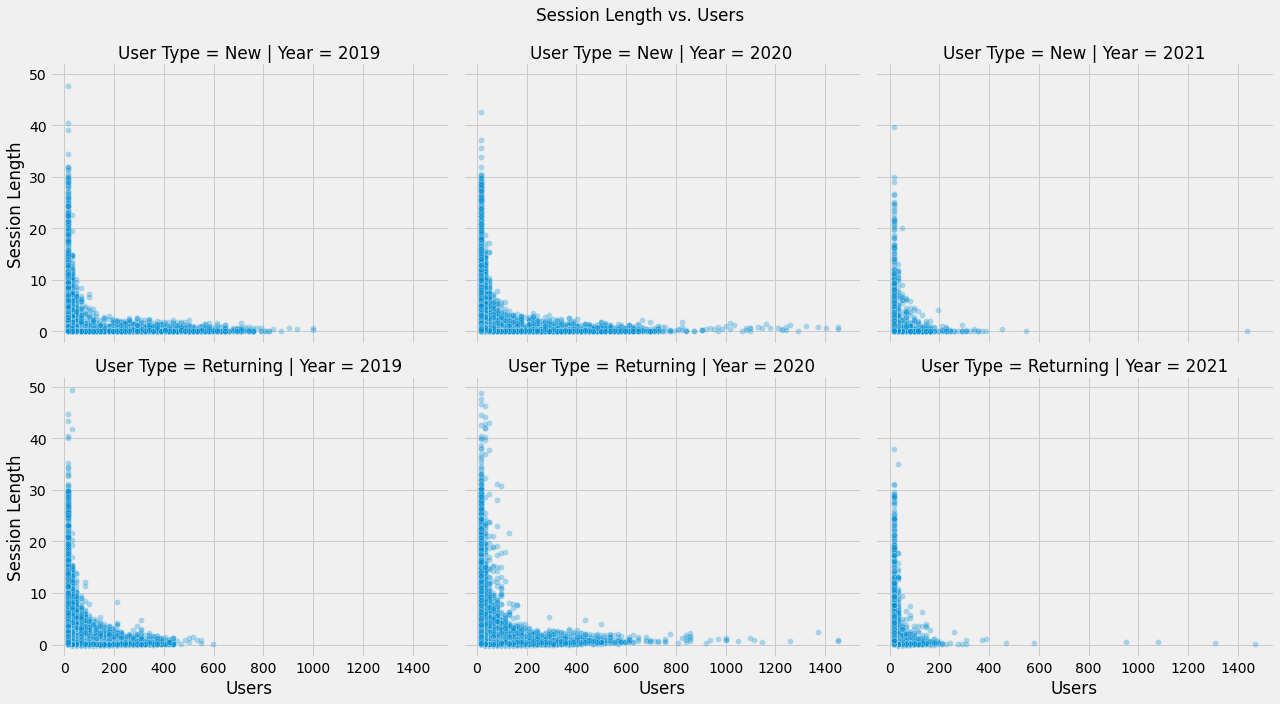

In [16]:
# Removing 31 outliers
g = sns.FacetGrid(data[(data["Users"] < 1500) &
                       (data["Users"] > 0) &
                       (data["Session Length"] < 50) &
                       (data["Session Length"] > 0)],
                  row="User Type",
                  col="Year",
                  height=5,
                  aspect=1.2)

g.map(sns.scatterplot, "Users", "Session Length", alpha=0.3)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Session Length vs. Users')

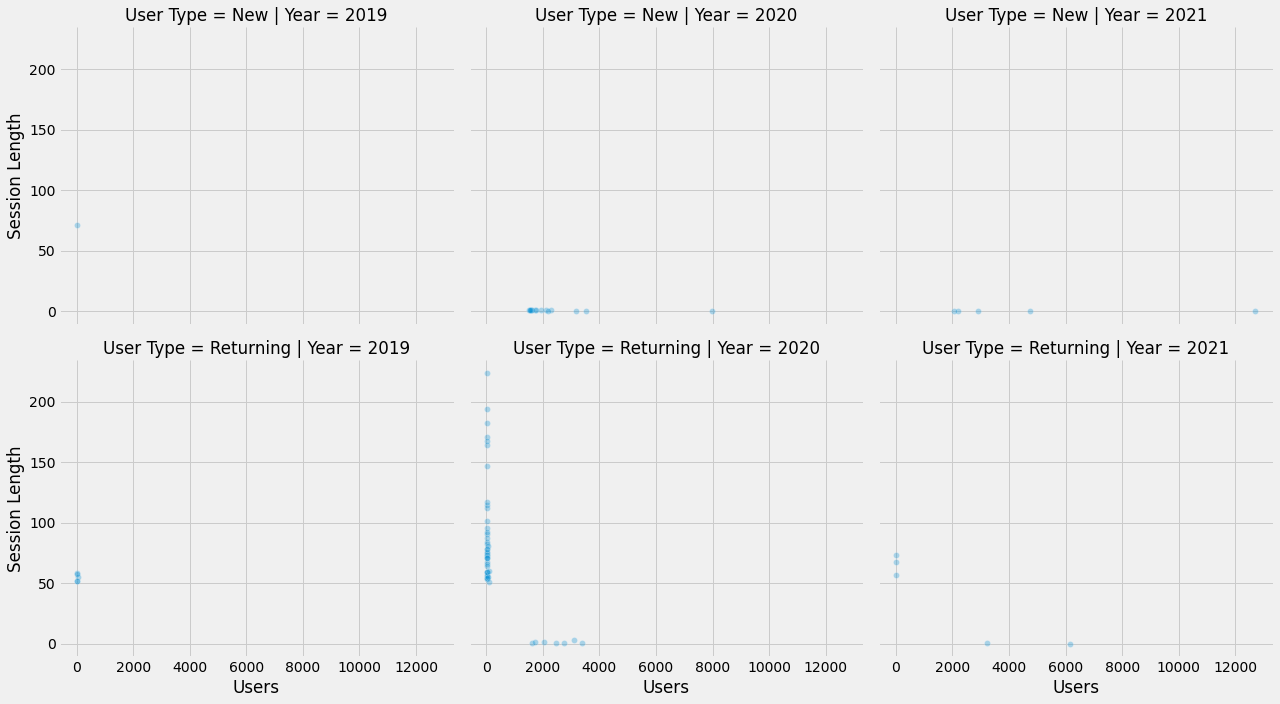

In [17]:
g = sns.FacetGrid(data[(data["Users"] >= 1500) | (data["Session Length"] >= 50)],
                  row="User Type",
                  col="Year",
                  height=5,
                  aspect=1.2)

g.map(sns.scatterplot, "Users", "Session Length", alpha=0.3)
# make this a separate plots

<AxesSubplot:title={'center':'Session Length by Month, User Type'}, xlabel='Month', ylabel='Average Session Length (mins)'>

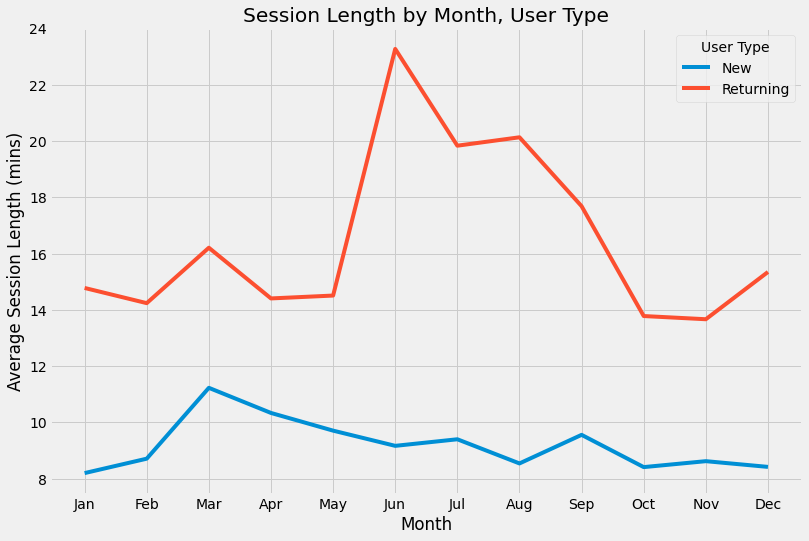

In [18]:
plt.figure(figsize=(12,8))
plt.xticks(range(1, 13), "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split())
plt.title("Session Length by Month, User Type")
plt.ylabel("Average Session Length (mins)")
sns.lineplot(data=data, x="Month", y="Time on Page", hue="User Type", estimator=np.mean, ci=None)

Text(0.5, 0.98, 'Page Hits by Year, Device Category')

<Figure size 864x576 with 0 Axes>

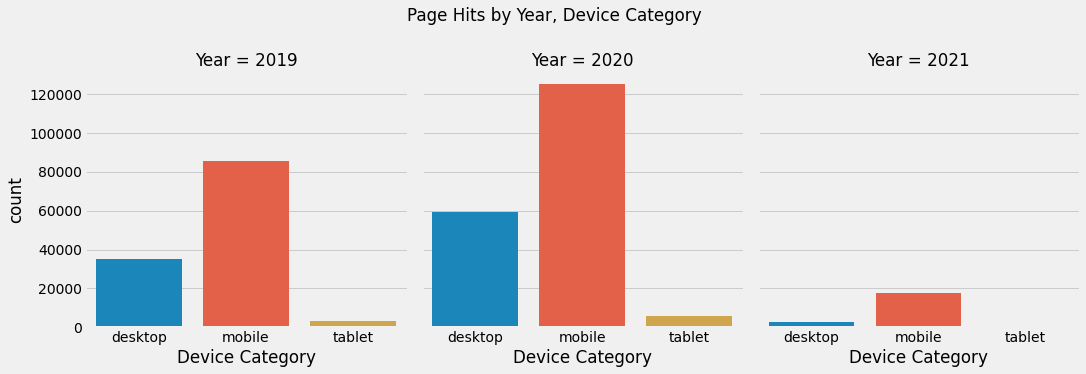

In [19]:
plt.figure(figsize=(12,8))
g = sns.catplot(data=data, x="Device Category", col="Year", kind="count", order=["desktop", "mobile", "tablet"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Page Hits by Year, Device Category")

Text(0.5, 0.98, 'Page Hits by Year, Device Category, User Type')

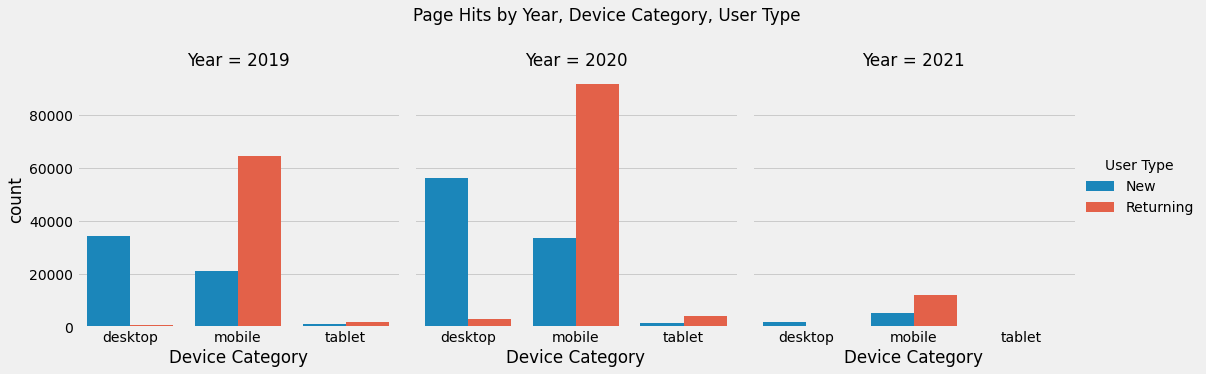

In [20]:
g = sns.catplot(data=data, x="Device Category", col="Year", hue="User Type", kind="count", order=["desktop", "mobile", "tablet"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Page Hits by Year, Device Category, User Type')